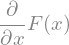

In [1]:
from sympy import *
from sympy.printing.latex import LatexPrinter
from sympy.core.function import _coeff_isneg, AppliedUndef, Derivative
from sympy.printing.precedence import precedence, PRECEDENCE

class CustomPrint(LatexPrinter):
    def _print_Derivative(self, expr):
        diff_symbol = r'\partial'

        
        tex = "" 
        dim = 0
        for x, num in reversed(expr.variable_count):
            dim += num
            if num == 1:
                tex += r"%s %s" % (diff_symbol, self._print(x))
            else:
                tex += r"%s %s^{%s}" % (diff_symbol,
                                        self.parenthesize_super(self._print(x)),
                                        self._print(num))

        if dim == 1:
            tex = r"\frac{%s}{%s}" % (diff_symbol, tex) 
        else:
            tex = r"\frac{%s^{%s}}{%s}" % (diff_symbol, self._print(dim), tex) 

        if any(_coeff_isneg(i) for i in expr.args):
            return r"%s %s" % (tex, self.parenthesize(expr.expr,
                                                  PRECEDENCE["Mul"],
                                                  is_neg=True,
                                                  strict=True))

        return r"%s %s" % (tex, self.parenthesize(expr.expr,
                                                  PRECEDENCE["Mul"],
                                                  is_neg=False,
                                                  strict=True))
        
def custom_print_func(expr, **settings):
    return CustomPrint().doprint(expr)
    
    
x = symbols('x')
F = Function('F')(x)
init_printing(use_latex=True,latex_mode="plain",latex_printer=custom_print_func)

dF_dx = F.diff(x)

display(dF_dx)



